# Question 4
##Importing libraries

In [81]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

##Loading the data

In [82]:
Data=pd.read_csv('/content/drive/MyDrive/ID5055 assignments/Assignment_2/Gene_expression.csv')

In [83]:
Data.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10
0,44.238570,46.327568,49.336706,49.930000,52.155010,56.082897,57.758317,45.890225,60.454725,51.591349
1,65.909395,57.122918,51.468609,52.995711,56.320355,54.214907,38.064228,62.533744,53.105279,55.364910
2,57.219155,59.881927,54.669539,51.552905,47.547845,38.944785,65.598596,55.011085,53.275810,57.249075
3,46.615968,61.673988,43.844661,61.296659,48.107037,55.137401,43.697487,61.932580,49.239911,51.808106
4,46.002237,56.666401,52.667228,57.554166,66.118988,57.574394,59.343295,55.084425,57.494767,56.698555


In [84]:
Data.describe()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,53.047256,56.054060,52.936294,55.125278,52.903332,53.946114,55.095828,57.713138,54.386321,55.140259
std,9.056291,7.694602,6.791814,6.997775,7.129271,5.790310,8.923120,7.279601,6.111103,8.676297
min,37.881003,31.965615,43.213157,40.298918,39.102310,38.944785,34.702778,39.727245,39.068312,42.128937
25%,46.462535,52.743699,48.691600,50.450812,47.967239,51.770023,52.898122,54.321347,50.845409,49.381910
50%,51.041154,56.869399,51.864939,54.632826,51.633897,54.545738,56.174245,58.627875,54.429411,53.719266
75%,58.795002,61.277175,56.491938,59.572696,56.639313,57.818023,59.424213,62.082871,58.502670,59.175082
max,69.319945,66.785466,65.903332,72.820496,67.892842,62.050039,69.460192,73.110426,64.552957,77.628828


##Define the function for estimation $\mu$

In [85]:
def mu_post_sig_post(data,prior_mean,sigma_prior,sigma_dist=8):
  m=len(data)
  mu=prior_mean
  sig=sigma_prior
  return (((sig**2)*np.sum(data)+mu*(sigma_dist**2))/(m*(sig**2)+(sigma_dist**2))),(1/((m/sigma_dist**2)+(1/sig**2)))**0.5

In [86]:
Est_mean=[]
prior_mean=Data['Day 1'].mean()
sigma_prior=Data['Day 1'].std()
day=np.arange(0,11)
Est_mean.append(prior_mean)
label=[]
label_std=[]
Sig=[]
Sig.append(sigma_prior)
label.append('Prior before Day 1')
label_std.append('Prior before Day 1')
cols=Data.columns
for column in cols:
  label.append('posterior after '+column)
  label_std.append('Updated prior after '+column)
  print(column)
  mean,sigma=mu_post_sig_post(Data[column],prior_mean=prior_mean,sigma_prior=sigma_prior)
  Est_mean.append(mean)
  Sig.append(sigma)
  prior_mean=mean
  sigma_prior=sigma
  print(f"Estimated posterior mean {prior_mean}")

Day 1
Estimated posterior mean 53.0472556695
Day 2
Estimated posterior mean 54.52189017635951
Day 3
Estimated posterior mean 54.000143846515854
Day 4
Estimated posterior mean 54.278710324076094
Day 5
Estimated posterior mean 54.00576463571326
Day 6
Estimated posterior mean 53.995887155264946
Day 7
Estimated posterior mean 54.152150626939054
Day 8
Estimated posterior mean 54.59511368689183
Day 9
Estimated posterior mean 54.57201458269132
Day 10
Estimated posterior mean 54.628618139741114


##Variation of mean

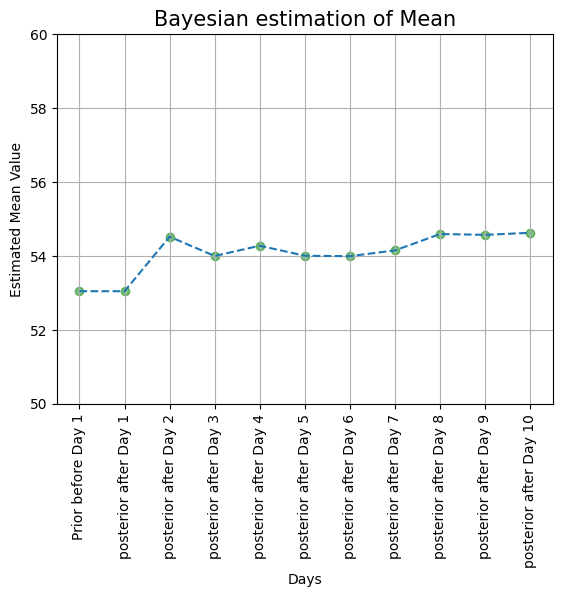

In [87]:
plt.scatter(day,Est_mean,marker='o',color='g',alpha=0.5)
plt.plot(day,Est_mean,linestyle='--')
plt.ylim(50,60)
plt.title('Bayesian estimation of Mean',fontsize=15)
plt.xticks(ticks=day,labels=label,rotation=90)
plt.ylabel('Estimated Mean Value')
plt.xlabel('Days')
plt.grid()
plt.show()

##Variation of standard deviation

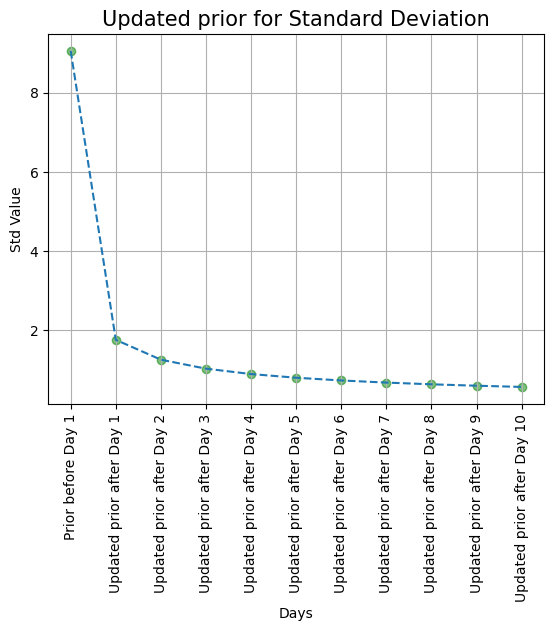

In [88]:
plt.scatter(day,Sig,marker='o',color='g',alpha=0.5)
plt.plot(day,Sig,linestyle='--')
plt.title('Updated prior for Standard Deviation',fontsize=15)
plt.xticks(ticks=day,labels=label_std,rotation=90)
plt.ylabel('Std Value')
plt.xlabel('Days')
plt.grid()
plt.show()

In [89]:
D_m={'Time':label,'Estimated Mean':Est_mean}
D_m=pd.DataFrame(D_m)
D_m.set_index('Time',inplace=True)
D_m

,Estimated Mean
Time,
Prior before Day 1,53.047256
posterior after Day 1,53.047256
posterior after Day 2,54.521890
posterior after Day 3,54.000144
posterior after Day 4,54.278710
posterior after Day 5,54.005765
posterior after Day 6,53.995887
posterior after Day 7,54.152151
posterior after Day 8,54.595114


In [90]:
D_m.to_csv('Mean.csv')

In [91]:
S_m={'Time':label_std,'Standard deviation':Sig}
S_m=pd.DataFrame(S_m)
S_m.set_index('Time',inplace=True)
S_m.to_csv('std.csv')

In [92]:
S_m

,Standard deviation
Time,
Prior before Day 1,9.056291
Updated prior after Day 1,1.754946
Updated prior after Day 2,1.252751
Updated prior after Day 3,1.026144
Updated prior after Day 4,0.890097
Updated prior after Day 5,0.796897
Updated prior after Day 6,0.727934
Updated prior after Day 7,0.674247
Updated prior after Day 8,0.630919


##Plotting the distribution

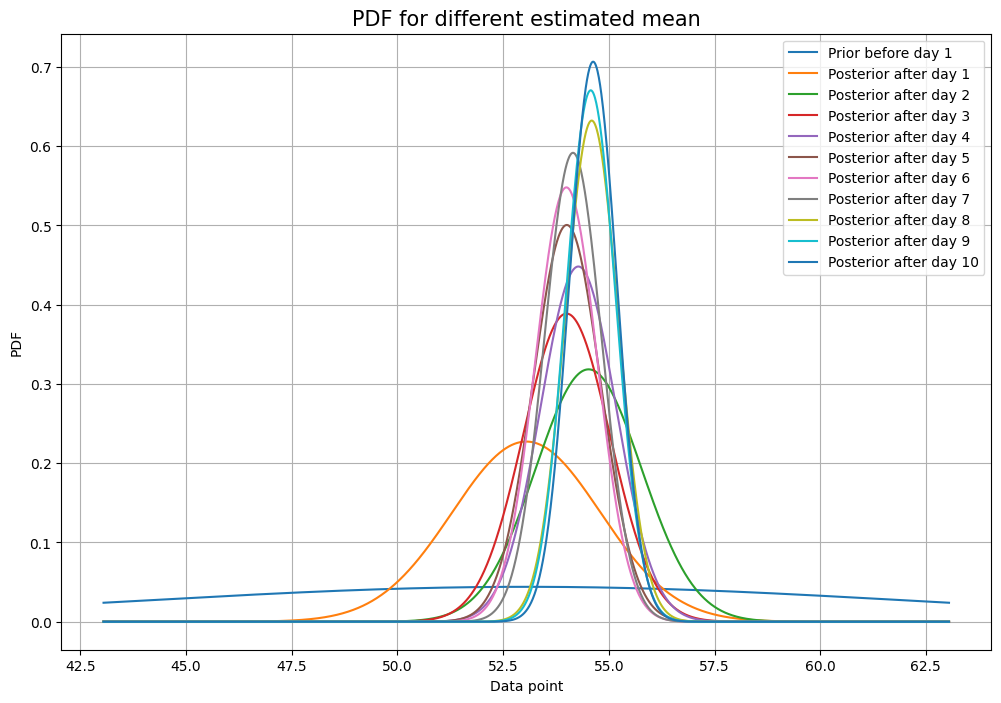

In [93]:
def normal(x,mu,std):
  return (1/(((2*np.pi)**0.5)*std))*np.exp(-0.5*((x-mu)/std)**2)
data=np.linspace(Data['Day 1'].mean()-10,Data['Day 1'].mean()+10,2000)
plt.figure(figsize=(12, 8))
for i,(mean,std) in enumerate(zip(Est_mean,Sig)):
  pdf=normal(data,mean,std)
  if i==0:
    plt.plot(data,pdf,label='Prior before day 1')
  else :
    plt.plot(data,pdf,label=f'Posterior after day {i}')
plt.title("PDF for different estimated mean",fontsize=15)
plt.ylabel("PDF")
plt.xlabel("Data point")
plt.legend()
plt.grid()
plt.show()

#End of Code